In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
from nebula.util.common import read_pickle, write_pickle
import pandas as pd
import numpy as np

In [8]:
km = read_pickle('km_wv.pkl')

In [9]:
res003 = pd.read_pickle('ticker_factor_results.pkl')

In [10]:
data_res = pd.read_pickle('factors_res.pkl')

In [11]:
returns = pd.read_pickle('sp500_daily_returns.pkl')

In [14]:
sp500_gics = pd.read_pickle('sp500_gics.pkl')

## start

In [7]:
res003 = pd.read_pickle('wv_ticker_mapped.pkl')

In [8]:
res003.head()

,s,vo,wv,org,ticker
date,,,,,
2018-07-03 18:16:26,centene corporation,reports quarter earnings of per share,"[0.069821596, 0.2268446, -0.1357558, -0.047921...",CENTENE,[CNC]
2014-01-30 13:09:06,nfl,encourage fans shopping to purchase from nfl t...,"[0.07208228, -0.0021257144, 0.2515124, -0.1012...",NFL,[NFLX]
2019-06-18 13:10:14,brand new day la segunda cancion de la bso de,bts world se publicara el de junio,"[0.075022005, -0.32528016, 0.34532014, 0.08970...",LA,"[ABT, AFL, ALK, GOOGL, GOOG, ADM, AJG, BIO, BL..."
2018-11-16 23:44:30,disfrutar un festin con,seguridad en el dia de accion de gracias,"[0.2405765, -0.18848814, 0.5541732, -0.0105670...",UN,"[AVB, CHTR, FBHS, HBAN, HII, IRM, JBHT, JNPR, ..."
2020-09-27 05:20:19,cambio de paradigma para un mayor valor huawei...,soluciones provenientes de escenarios tipicos ...,"[0.504565, 0.027096998, 0.547965, 0.246661, 0....",UN,"[AVB, CHTR, FBHS, HBAN, HII, IRM, JBHT, JNPR, ..."


In [211]:
from nebula.nlp.nlp import NLPProcessor

In [212]:
nlpp = NLPProcessor()

In [213]:
wv_model = nlpp.wv_model

In [56]:
wv_matrix=np.array([list(value) for value in res003['wv'].values])

In [59]:
from sklearn.cluster import KMeans
num_clusters = 10
km = KMeans(n_clusters=num_clusters)
km.fit(wv_matrix)

KMeans(n_clusters=10)

In [62]:
write_pickle(km, 'km_wv.pkl')

In [10]:
clusters = km.labels_.tolist()

In [11]:
res003['cluster'] = clusters

In [12]:
res003.head()

,s,vo,wv,org,ticker,cluster
date,,,,,,
2018-07-03 18:16:26,centene corporation,reports quarter earnings of per share,"[0.069821596, 0.2268446, -0.1357558, -0.047921...",CENTENE,[CNC],8
2014-01-30 13:09:06,nfl,encourage fans shopping to purchase from nfl t...,"[0.07208228, -0.0021257144, 0.2515124, -0.1012...",NFL,[NFLX],6
2019-06-18 13:10:14,brand new day la segunda cancion de la bso de,bts world se publicara el de junio,"[0.075022005, -0.32528016, 0.34532014, 0.08970...",LA,"[ABT, AFL, ALK, GOOGL, GOOG, ADM, AJG, BIO, BL...",7
2018-11-16 23:44:30,disfrutar un festin con,seguridad en el dia de accion de gracias,"[0.2405765, -0.18848814, 0.5541732, -0.0105670...",UN,"[AVB, CHTR, FBHS, HBAN, HII, IRM, JBHT, JNPR, ...",7
2020-09-27 05:20:19,cambio de paradigma para un mayor valor huawei...,soluciones provenientes de escenarios tipicos ...,"[0.504565, 0.027096998, 0.547965, 0.246661, 0....",UN,"[AVB, CHTR, FBHS, HBAN, HII, IRM, JBHT, JNPR, ...",7


In [281]:
wv_model.similar_by_vector(km.cluster_centers_[0])

[('that', 0.8098894357681274),
 ('provide', 0.8090167045593262),
 ('will', 0.8022102117538452),
 ('which', 0.8019976019859314),
 ('well', 0.7931753993034363),
 ('both', 0.7921819686889648),
 ('however', 0.7905528545379639),
 ('should', 0.7883714437484741),
 ('need', 0.786689817905426),
 ('because', 0.7819415926933289)]

In [243]:
res003[res003.cluster == 9].iloc[250]

s                                                      amgen
vo                   present th annual healthcare conference
wv         [0.0638264, -0.2080894, 0.154882, 0.23358801, ...
org                                                    AMGEN
ticker                                                [AMGN]
cluster                                                    9
factor                                            conference
Name: 2012-05-15 14:58:34, dtype: object

In [18]:
cluster_name = {
    0: 'provide support',
    1: 'acquisition',
    2: 'revenue',
    3: 'announcement',
    4: 'technology',
    5: 'management',
    6: 'improvement',
    7: 'foreign',
    8: 'report results',
    9: 'conference',
    
}

In [14]:
res003['factor'] = res003['cluster'].map(cluster_name)

In [186]:
res003.to_pickle('ticker_factor_results.pkl')

In [176]:
data_list = []
total = len(res003)
count = 0
for idx, row in res003[['ticker', 'factor']].iterrows():
    count = count + 1
    #print(f'processing {count} of {total}')
    tickers = row['ticker']
    factor = row['factor']
    for ticker in tickers:
        data_list.append(pd.DataFrame(data={'date': [idx], 'ticker': [ticker], 'factor': [factor]}))

data_res = pd.concat(data_list, axis=0)
data_res = data_res.set_index('date')

In [181]:
data_res.index = pd.to_datetime(data_res.index.map(lambda x: x.date()))

In [182]:
data_res = data_res.sort_index()

In [184]:
data_res['value'] = 1

In [185]:
data_res = data_res.set_index(['ticker', 'factor'], append=True)

In [186]:
data_res = data_res.groupby(['date', 'ticker', 'factor']).sum()

In [187]:
data_res = data_res.squeeze()

In [188]:
data_res = data_res.unstack()

In [189]:
data_res.to_pickle('factors_res.pkl')

In [28]:
data_res.head()

factor             acquisition  announcement  conference  foreign  \
date       ticker                                                   
2009-09-27 KMI             NaN           NaN         NaN      NaN   
2009-09-28 AAPL            NaN           NaN         NaN      NaN   
           ABBV            NaN           NaN         NaN      NaN   
           ADBE            NaN           NaN         NaN      NaN   
           ADI             NaN           NaN         NaN      NaN   

factor             improvement  management  provide support  report results  \
date       ticker                                                             
2009-09-27 KMI             NaN         NaN              1.0             NaN   
2009-09-28 AAPL            NaN         1.0              NaN             NaN   
           ABBV            NaN         1.0              NaN             NaN   
           ADBE            NaN         1.0              NaN             NaN   
           ADI             NaN         1.0              NaN             NaN   

factor             revenue  technology  
date       ticker                       
2009-09-27 KMI         NaN         NaN  
2009-09-28 AAPL        NaN         NaN  
           ABBV        NaN         NaN  
           ADBE        NaN         NaN  
           ADI         NaN         NaN

In [17]:
data_res.columns

Index(['acquisition', 'announcement', 'conference', 'foreign', 'improvement',
       'management', 'provide support', 'report results', 'revenue',
       'technology'],
      dtype='object', name='factor')

<AxesSubplot:xlabel='date'>

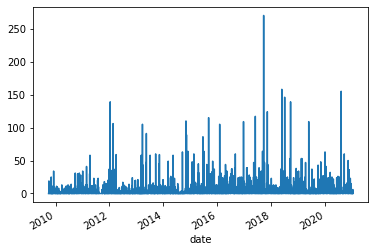

In [18]:
data_res['acquisition'].groupby('date').count().plot()

<AxesSubplot:xlabel='date'>

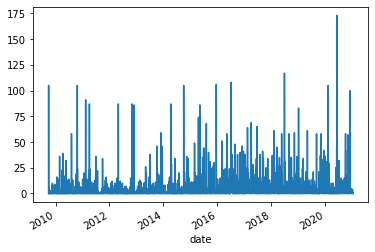

In [192]:
data_res['management'].groupby('date').count().plot()

<AxesSubplot:xlabel='date'>

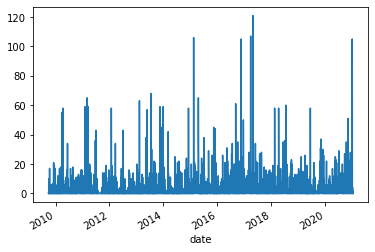

In [193]:
data_res['announcement'].groupby('date').count().plot()

<AxesSubplot:xlabel='date'>

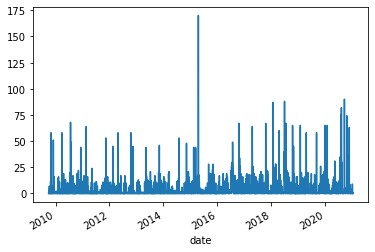

In [194]:
data_res['report results'].groupby('date').count().plot()

<AxesSubplot:xlabel='date'>

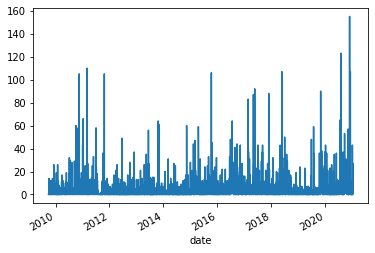

In [195]:
data_res['technology'].groupby('date').count().plot()

<AxesSubplot:xlabel='date'>

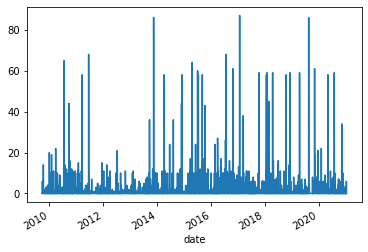

In [196]:
data_res['revenue'].groupby('date').count().plot()

In [19]:
factor_acq = data_res['acquisition']

In [20]:
factor_acq

date        ticker
2009-09-27  KMI       NaN
2009-09-28  AAPL      NaN
            ABBV      NaN
            ADBE      NaN
            ADI       NaN
                     ... 
2021-01-12  URI       1.0
            WBA       NaN
            WLTW      NaN
            WST       NaN
2021-01-13  HWM       NaN
Name: acquisition, Length: 144627, dtype: float64

In [24]:
factor_acq = factor_acq.unstack()

In [302]:
import missingno as msno

<AxesSubplot:>

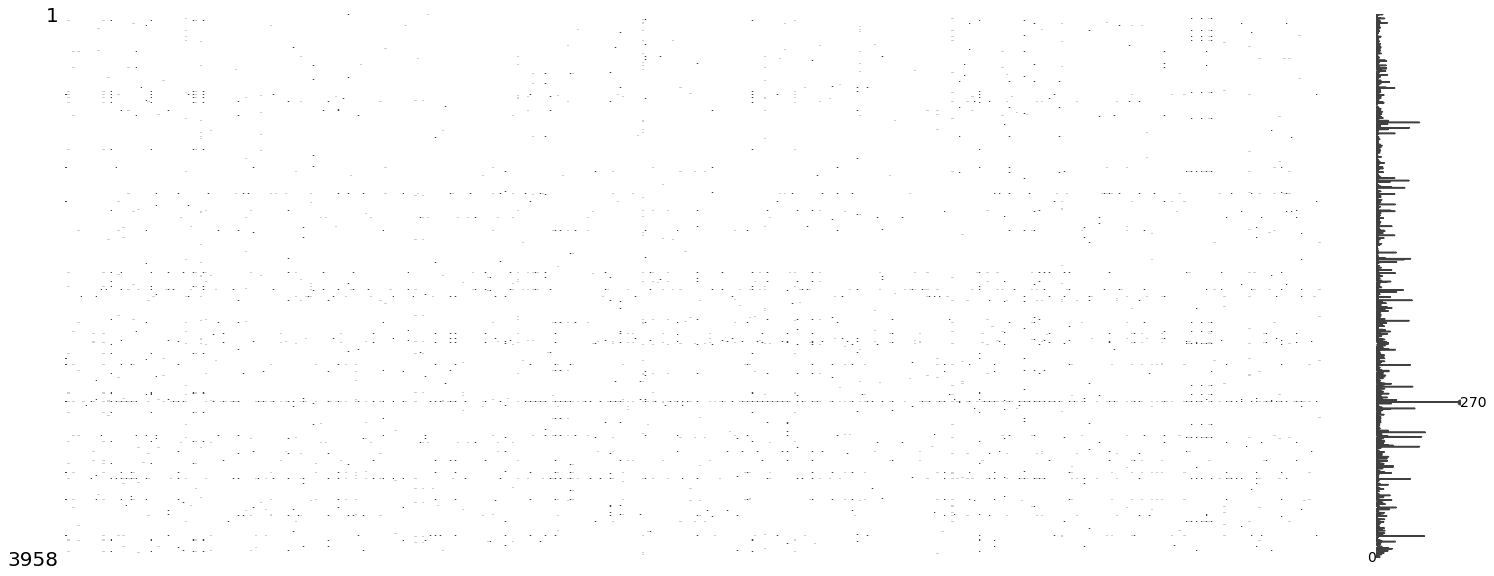

In [201]:
msno.matrix(factor_acq)

In [202]:
factor_acq_roll14 = factor_acq.rolling(14, min_periods=1).sum()

<AxesSubplot:>

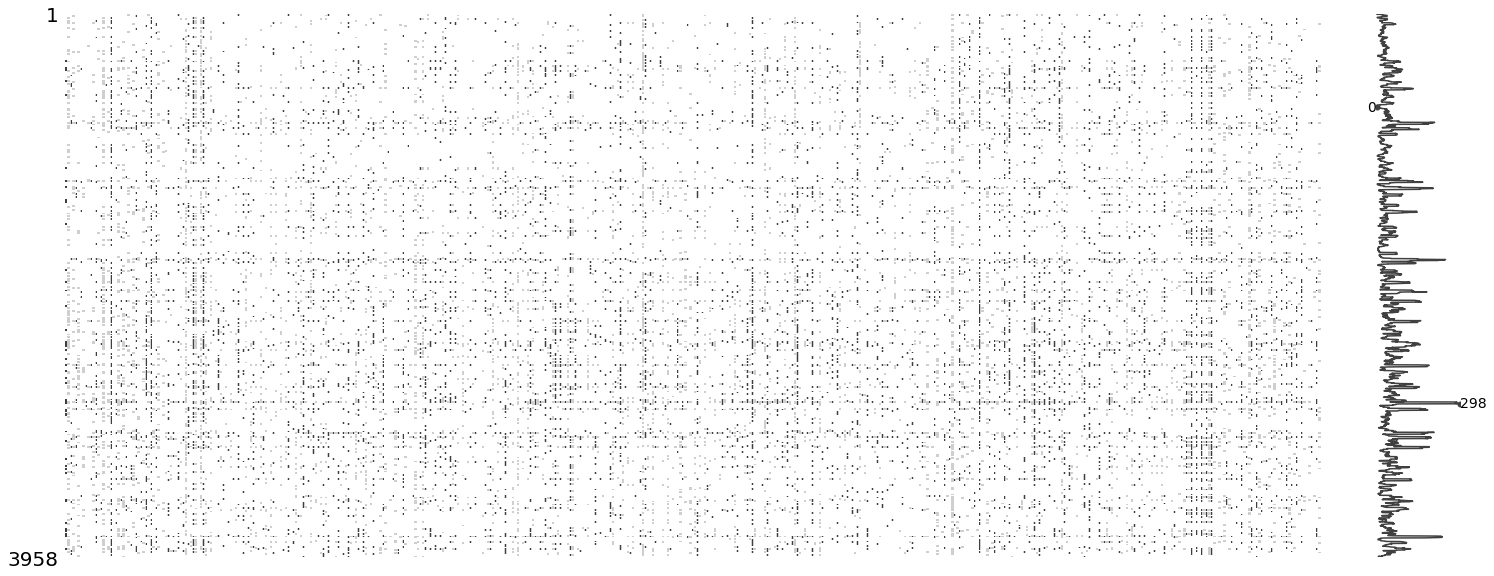

In [203]:
msno.matrix(factor_acq_roll14)

<AxesSubplot:xlabel='date'>

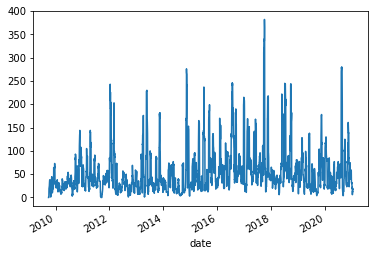

In [204]:
factor_acq_roll14.sum(axis=1).plot()

In [205]:
factor_acq_roll14.sum(axis=1).mean()

56.67458312278929

In [206]:
roll14_count = factor_acq_roll14.sum(axis=1)

In [207]:
roll14_count

date
2009-09-27     0.0
2009-09-28     0.0
2009-09-29     0.0
2009-09-30     0.0
2009-10-01     0.0
              ... 
2021-01-09    12.0
2021-01-10    12.0
2021-01-11    14.0
2021-01-12    19.0
2021-01-13    18.0
Length: 3958, dtype: float64

In [208]:
factor_acq_roll14_port = factor_acq_roll14.div(roll14_count, axis='rows')

In [211]:
factor_acq_roll14_port.index = pd.to_datetime(factor_acq_roll14_port.index).shift(1, 'B')

In [212]:
returns = returns.reindex(factor_acq_roll14_port.index)

In [213]:
returns = returns[factor_acq_roll14_port.columns]

In [214]:
factor_acq_roll14_port

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2009-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,NaN,NaN,NaN,NaN,NaN,0.083333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-11,NaN,NaN,NaN,NaN,NaN,0.083333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-12,NaN,NaN,NaN,NaN,NaN,0.071429,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2009-09-28,0.011240,-0.004032,0.005616,0.020727,NaN,0.012087,0.071888,0.026411,0.049003,0.028099,...,0.016832,0.012955,0.027083,-0.144480,NaN,0.009538,0.018708,0.000378,0.023060,NaN
2009-09-29,0.000359,-0.014170,-0.005077,-0.004137,NaN,0.009646,-0.004004,0.010704,-0.016891,-0.007592,...,-0.015280,-0.007472,-0.000289,0.031250,NaN,-0.000913,-0.005750,-0.015129,0.000000,NaN
2009-09-30,-0.002509,-0.034907,0.002296,-0.000162,NaN,0.018199,-0.024121,0.007536,0.000537,0.011016,...,0.009482,-0.006660,0.001159,-0.022727,NaN,0.029896,-0.002798,-0.004224,-0.012095,NaN
2009-10-01,-0.043837,-0.093617,-0.034114,-0.024224,NaN,-0.015639,-0.021627,-0.015969,-0.019855,-0.026029,...,-0.043980,-0.019531,-0.025767,-0.032300,NaN,-0.018661,-0.013096,-0.020440,-0.088480,NaN
2009-10-02,-0.011274,0.011737,-0.012125,0.022338,NaN,-0.018611,0.040000,0.023829,0.026553,0.005283,...,-0.010272,-0.010257,-0.001486,-0.022697,NaN,0.000604,-0.023697,-0.011417,0.018315,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,0.008579,-0.008592,0.005645,-0.023249,0.016314,-0.024357,0.001635,-0.006899,-0.014423,-0.022387,...,0.020880,0.030356,0.005500,-0.004671,-0.012665,0.004853,0.000315,0.020519,0.023604,0.007614
2021-01-11,0.008579,-0.008592,0.005645,-0.023249,0.016314,-0.024357,0.001635,-0.006899,-0.014423,-0.022387,...,0.020880,0.030356,0.005500,-0.004671,-0.012665,0.004853,0.000315,0.020519,0.023604,0.007614
2021-01-12,-0.009208,0.025333,0.033037,-0.001396,0.006971,-0.007732,0.000247,-0.018044,-0.007490,-0.005461,...,-0.029190,0.022203,0.024786,-0.009386,-0.001792,0.000000,0.005220,-0.014113,0.009826,-0.019305


In [221]:
factor_acq_roll14_daily = factor_acq_roll14_port.mul(returns).sum(axis='columns')

In [222]:
factor_acq_roll14_daily

date
2009-09-28    0.000000
2009-09-29    0.000000
2009-09-30    0.000000
2009-10-01    0.000000
2009-10-02    0.000000
                ...   
2021-01-11    0.002872
2021-01-11    0.002872
2021-01-12    0.004621
2021-01-13   -0.002511
2021-01-14    0.005568
Length: 3958, dtype: float64

In [20]:
def cumulative_returns(returns):

    res = (returns + 1.0).cumprod()

    return res

In [224]:
factor_acq_roll14_cum = cumulative_returns(factor_acq_roll14_daily)

<AxesSubplot:xlabel='date'>

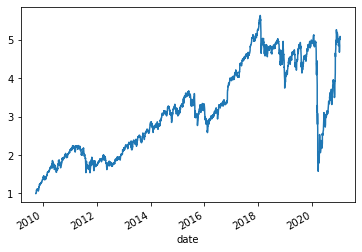

In [226]:
factor_acq_roll14_cum.plot()

In [233]:
eq_weight = factor_acq_roll14_port.copy()

In [237]:
eq_weight.loc[:] = 1/len(eq_weight.columns)

In [240]:
eq_weight_daily = eq_weight.mul(returns).sum(axis='columns')

In [241]:
eq_weight_cum = cumulative_returns(eq_weight_daily)

<AxesSubplot:xlabel='date'>

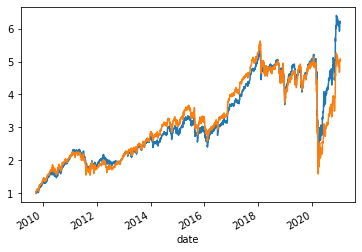

In [243]:
eq_weight_cum.plot()
factor_acq_roll14_cum.plot()

In [245]:
factor_acq_roll3 = factor_acq.rolling(3, min_periods=1).sum()

In [250]:
roll3_count = factor_acq_roll3.sum(axis=1)
factor_acq_roll3_port = factor_acq_roll3.div(roll3_count, axis='rows')
factor_acq_roll3_port.index = pd.to_datetime(factor_acq_roll3_port.index).shift(1, 'B')

In [252]:
factor_acq_roll3_daily = factor_acq_roll3_port.mul(returns).sum(axis='columns')

In [253]:
factor_acq_roll3_cum = cumulative_returns(factor_acq_roll3_daily)

In [17]:
eq_weight_cum.plot()
factor_acq_roll14_cum.plot()
factor_acq_roll3_cum.plot()

NameError: name 'eq_weight_cum' is not defined

In [12]:
def equal_weight(factor):
    eq_factor = pd.DataFrame(1, index=factor.index, columns=factor.columns)
    return eq_factor


def factor_strategy(factor, roll=None, leverage=1, groups=None, neutral=False):
    factor = factor.copy()
    if roll is not None:
        factor = factor.rolling(roll, min_periods=1).sum()
        
    group_weights = None
    if groups is not None:
        groups = groups.copy()
        grp_col = groups.columns[0]
        res = groups.reindex(factor.columns).set_index(grp_col, append=True)
        res = res.reorder_levels([grp_col, 'ticker']).index
        factor.columns = res
        if neutral:
            factor_sn = factor.div(factor.groupby(grp_col, axis='columns').sum(), axis='rows')
        else:
            factor_sn = factor
        
        group_weights = factor_sn.groupby(grp_col, axis='columns').sum()
        
        factor_sn.columns = factor_sn.columns.droplevel(0)
        factor = factor_sn
        
    factor_count = factor.sum(axis=1)
    factor_strategy = factor.div(factor_count, axis='rows')
    return factor_strategy.mul(leverage), group_weights


def calc_returns(factor_strategy, returns, trade_cost=None):
    strategy_sod = factor_strategy.copy()
    strategy_sod.index = strategy_sod.index.shift(1, 'B')
    
    returns = returns.reindex(strategy_sod.index)
    returns = returns[strategy_sod.columns]
    
    daily_returns = strategy_sod.mul(returns).sum(axis='columns')
    
    if trade_cost is not None:
        trades = strategy_sod.sub(strategy_sod.shift(1))
        daily_returns = daily_returns.sub(trades.abs().mul(trade_cost).sum(axis='columns'))
    
    cum_returns = cumulative_returns(daily_returns)
    
    return cum_returns, daily_returns


def performance_data(factor, returns, roll=None, title=None, leverage=1, groups=None, trade_cost=None, neutral=False):
    strat, gweights = factor_strategy(factor, roll, leverage, groups=groups, neutral=neutral)
    ret, daily_ret = calc_returns(strat, returns, trade_cost=trade_cost)
    
    if title is None:
        title = f'roll-{roll}'
    ret.name = title
    daily_ret.name = title
    gweights.name = title
    
    return ret, daily_ret, gweights


def performance_data_list(factor, returns, rolls=[], groups=None, trade_cost=None, neutral=False):
    rets = []
    drets = []
    gwgts = []
    
    ret, dret, gw = performance_data(equal_weight(factor), returns, title='equal weight', groups=groups, trade_cost=trade_cost, neutral=neutral)
    rets.append(ret)
    drets.append(dret)
    gwgts.append(gw)
    
    ret, dret, gw = performance_data(equal_weight(factor), returns, title='equal weight 1.5', leverage=1.5, groups=groups, trade_cost=trade_cost, neutral=neutral)
    rets.append(ret)
    drets.append(dret)
    gwgts.append(gw)

    ret, dret, gw = performance_data(factor, returns, groups=groups, trade_cost=trade_cost, neutral=neutral)
    rets.append(ret)
    drets.append(dret)
    gwgts.append(gw)

    for roll in rolls:
        ret, dret, gw = performance_data(factor, returns, roll, groups=groups, trade_cost=trade_cost, neutral=neutral)
        rets.append(ret)
        drets.append(dret)
        gwgts.append(gw)
        
    rets = pd.concat(rets, axis=1)
    drets = pd.concat(drets, axis=1)
    return rets, drets, gwgts

In [15]:
import nebula.finance.analytics.performance as nperf

In [553]:
factor = data_res['acquisition'].unstack()
rets_acq, drets_acq, gwgts = performance_data_list(factor, returns, rolls=[2, 5, 8, 10], groups=sp500_gics, trade_cost=5e-4)

<AxesSubplot:xlabel='GICS Sector'>

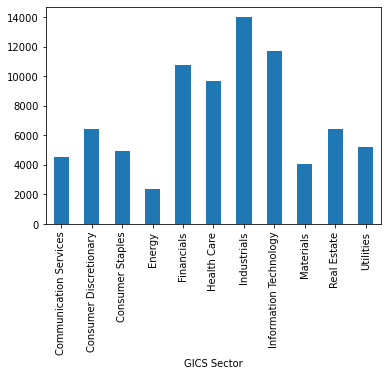

In [556]:
gwgts[4].sum(axis='rows').plot.bar()

<AxesSubplot:xlabel='date'>

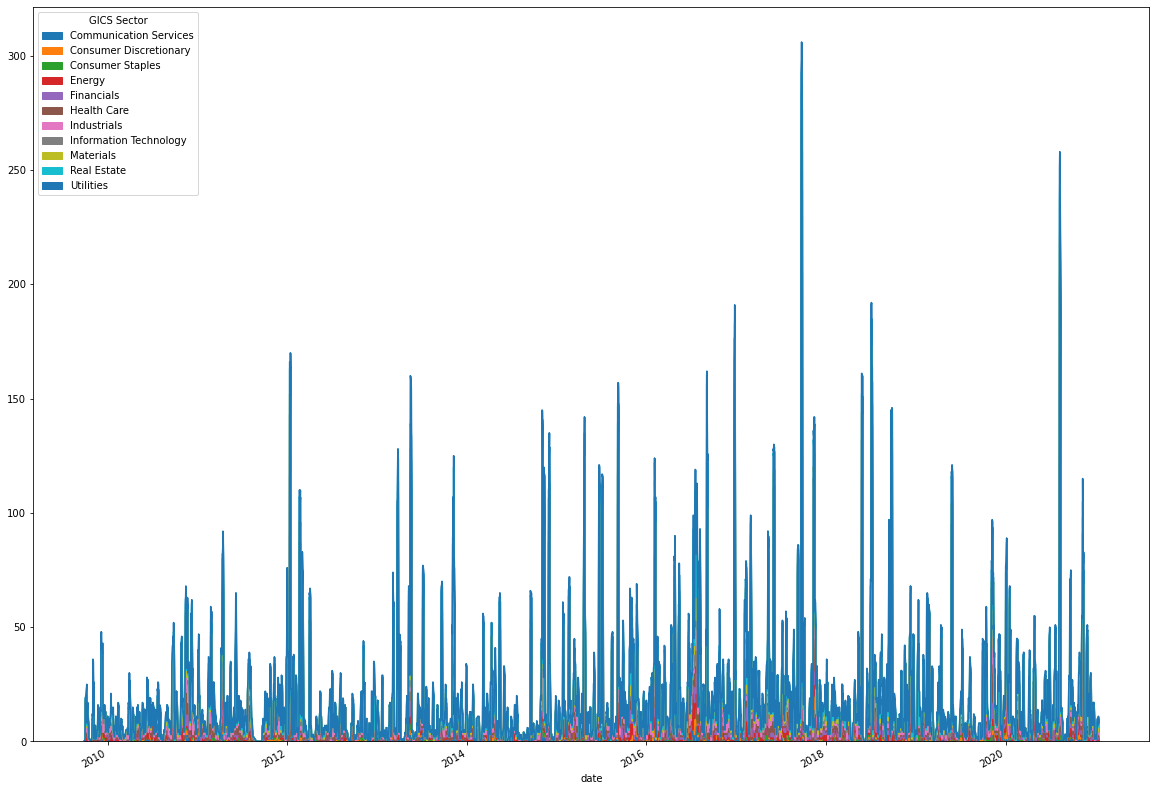

In [555]:
gwgts[4].plot.area(figsize=(20, 15))

roll-None          -0.309646
roll-2             -0.225093
roll-5             -0.180549
roll-10            -0.062842
roll-8             -0.054775
equal weight        0.000000
equal weight 1.5    0.224453
dtype: float64

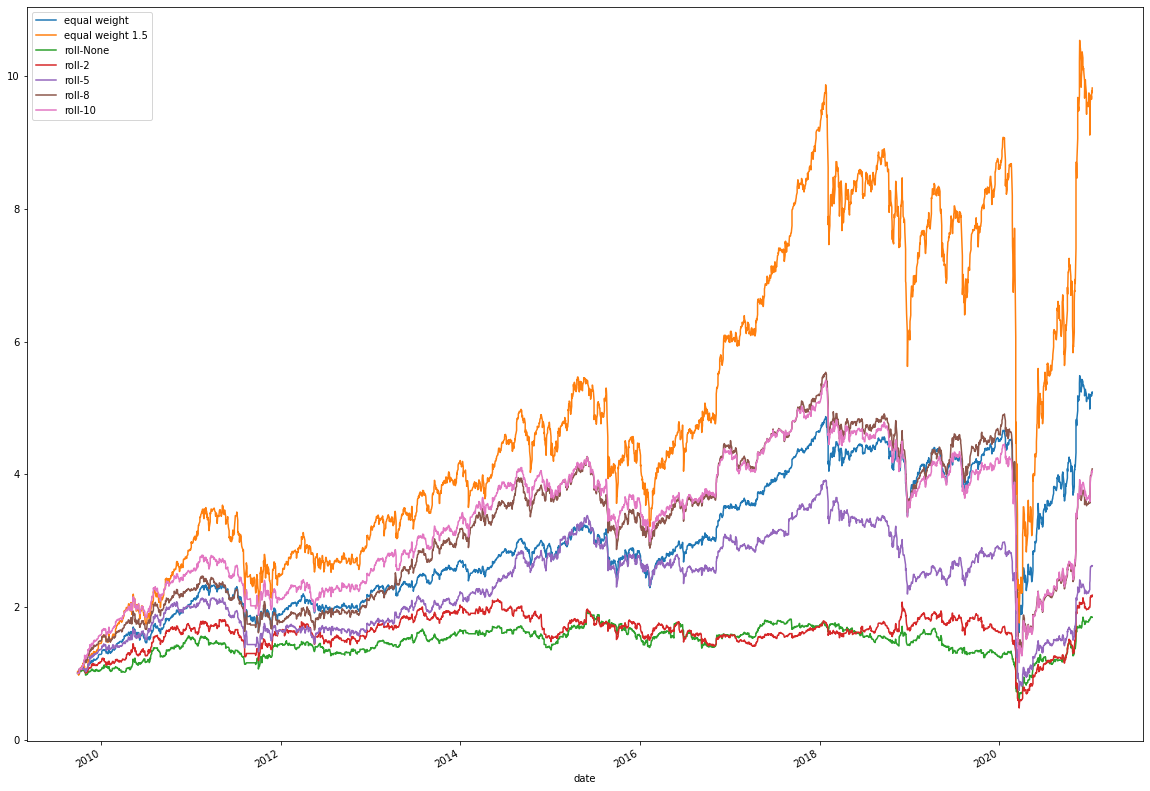

In [500]:
rets_acq.plot(figsize=(20, 15))
nperf.sharpe(drets_acq, returns_ref=drets_acq['equal weight']).sort_values()

In [21]:
factor = data_res['management'].unstack()
rets_mng, drets_mng, gwgts_mng = performance_data_list(factor, returns, rolls=[5, 10, 13, 15, 100], groups=sp500_gics, neutral=False, trade_cost=2.5e-4)

<AxesSubplot:xlabel='GICS Sector'>

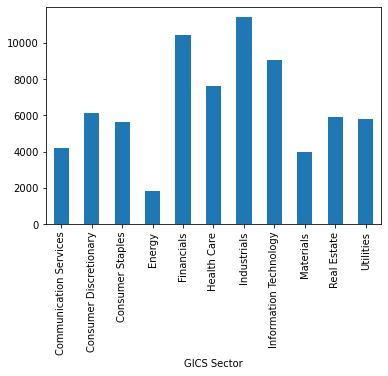

In [23]:
gwgts_mng[3].sum(axis='rows').plot.bar()

<AxesSubplot:xlabel='date'>

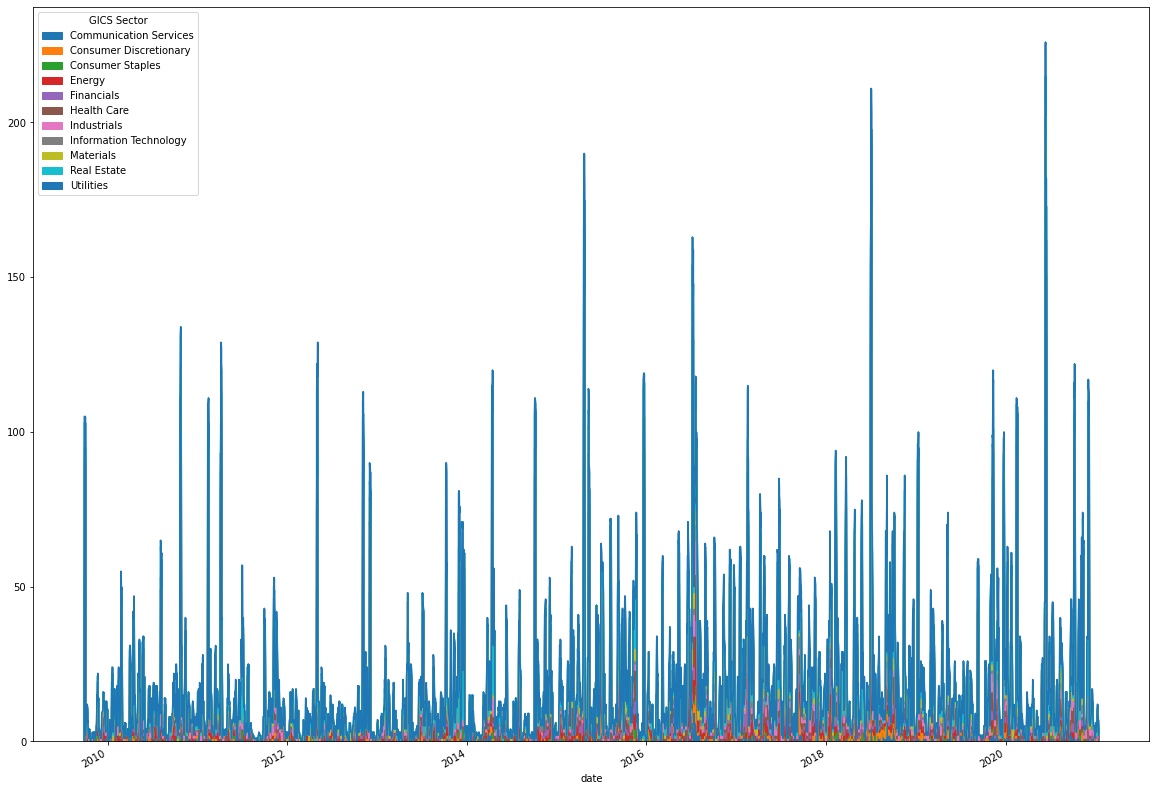

In [24]:
gwgts_mng[3].plot.area(figsize=(20, 15))

In [542]:
# need max-drawdown and turnover

In [25]:
drets_mng.std(axis='rows')

equal weight        0.011562
equal weight 1.5    0.017343
roll-None           0.011917
roll-5              0.013367
roll-10             0.012067
roll-13             0.012016
roll-15             0.012003
roll-100            0.011602
dtype: float64

roll-None          -0.056993
roll-15            -0.033538
roll-100           -0.033283
roll-10            -0.013372
equal weight        0.000000
roll-13             0.011299
roll-5              0.208507
equal weight 1.5    0.242282
dtype: float64

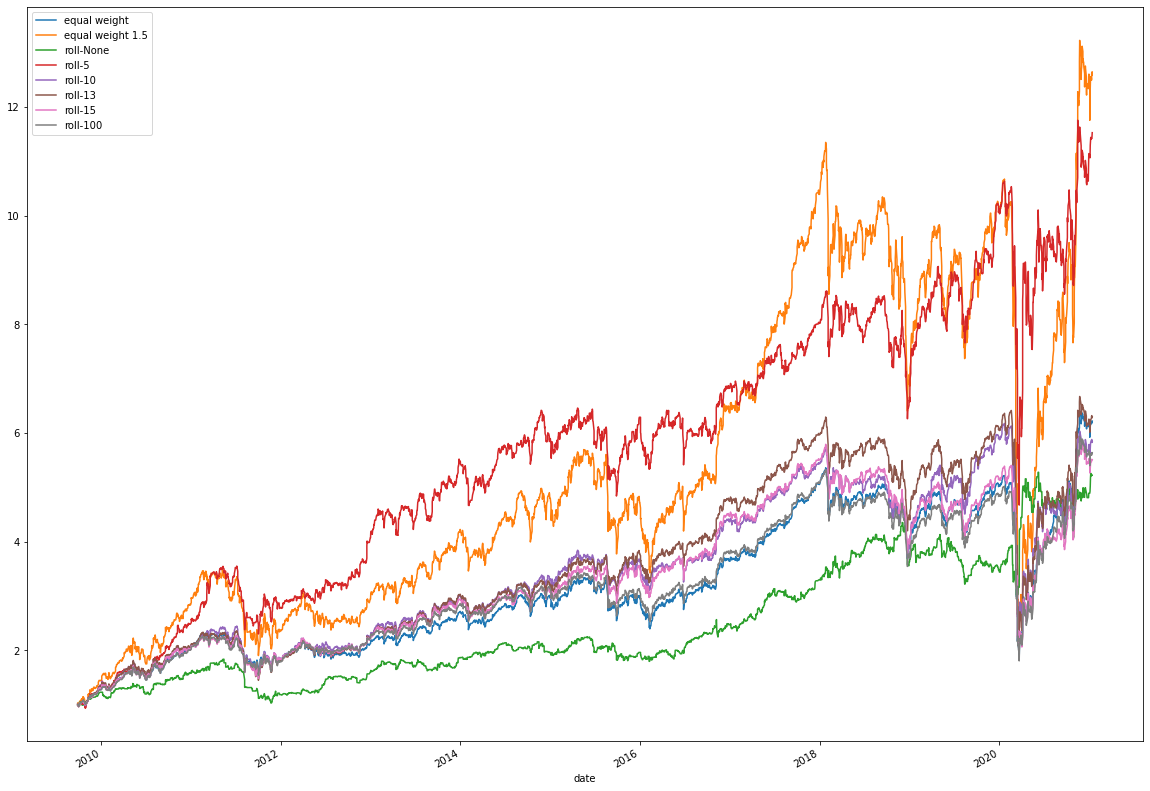

In [26]:
rets_mng.plot(figsize=(20, 15))
nperf.sharpe(drets_mng, returns_ref=drets_mng['equal weight']).sort_values()

In [27]:
rets_mng.corr()

,equal weight,equal weight 1.5,roll-None,roll-5,roll-10,roll-13,roll-15,roll-100
equal weight,1.000000,0.995568,0.879324,0.942793,0.981578,0.984226,0.976776,0.994918
equal weight 1.5,0.995568,1.000000,0.856150,0.913827,0.972256,0.979335,0.972481,0.988744
roll-None,0.879324,0.856150,1.000000,0.904822,0.847645,0.844036,0.810955,0.850545
roll-5,0.942793,0.913827,0.904822,1.000000,0.957370,0.938220,0.923197,0.945090
roll-10,0.981578,0.972256,0.847645,0.957370,1.000000,0.994827,0.988439,0.988352
roll-13,0.984226,0.979335,0.844036,0.938220,0.994827,1.000000,0.995636,0.989692
roll-15,0.976776,0.972481,0.810955,0.923197,0.988439,0.995636,1.000000,0.988963
roll-100,0.994918,0.988744,0.850545,0.945090,0.988352,0.989692,0.988963,1.000000


In [404]:
factor = data_res['announcement'].unstack()
rets_ann, drets_ann = performance_data_list(factor, returns, rolls=[2, 5, 8, 10, 13, 15, 100], groups=sp500_gics)

roll-2             -0.230943
roll-5             -0.218145
roll-8             -0.130875
roll-None          -0.109996
roll-10            -0.003863
equal weight        0.000000
roll-100            0.009312
roll-15             0.065569
roll-13             0.071326
equal weight 1.5    0.224453
dtype: float64

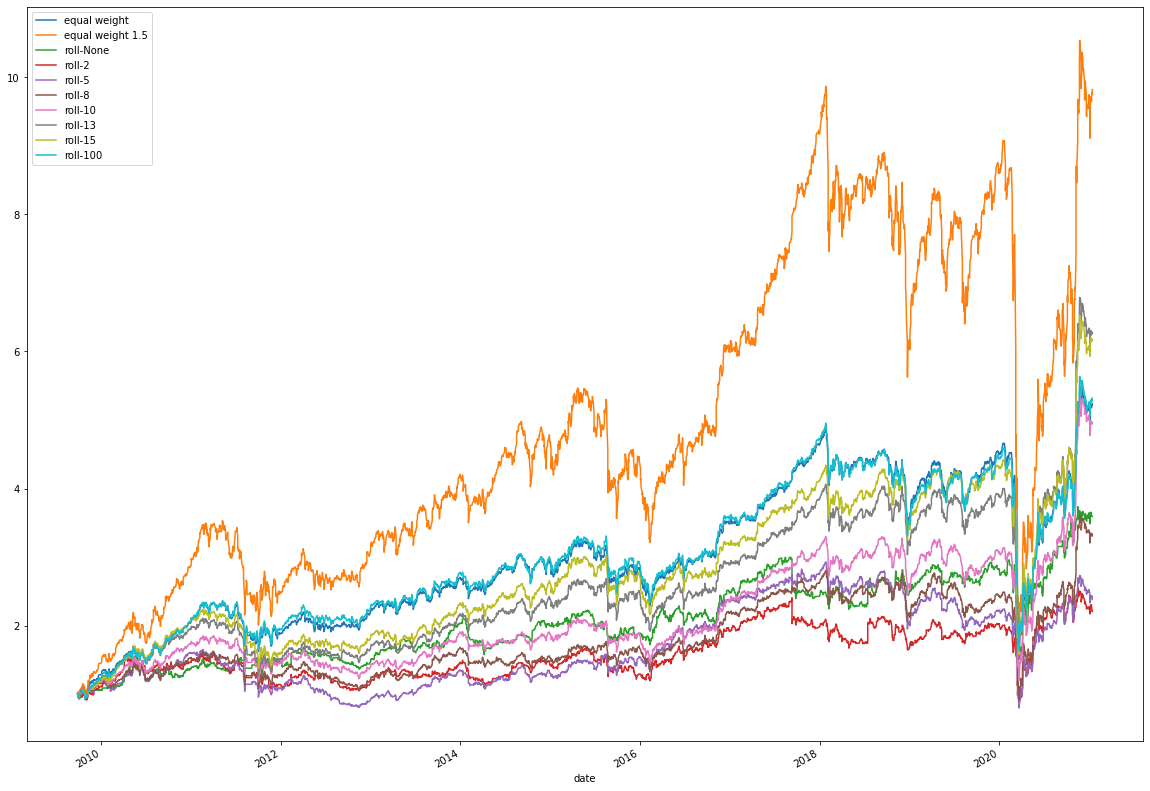

In [405]:
rets_ann.plot(figsize=(20, 15))
nperf.sharpe(drets_ann, returns_ref=drets_ann['equal weight']).sort_values()

In [406]:
factor = data_res['technology'].unstack()
rets_tch, drets_tch = performance_data_list(factor, returns, rolls=[2, 5, 8, 10, 13, 15, 100], groups=sp500_gics)

roll-2             -0.116396
roll-100           -0.040449
roll-8             -0.033394
roll-5             -0.029908
roll-10            -0.020229
roll-None          -0.015251
roll-13            -0.011233
equal weight        0.000000
roll-15             0.024776
equal weight 1.5    0.224453
dtype: float64

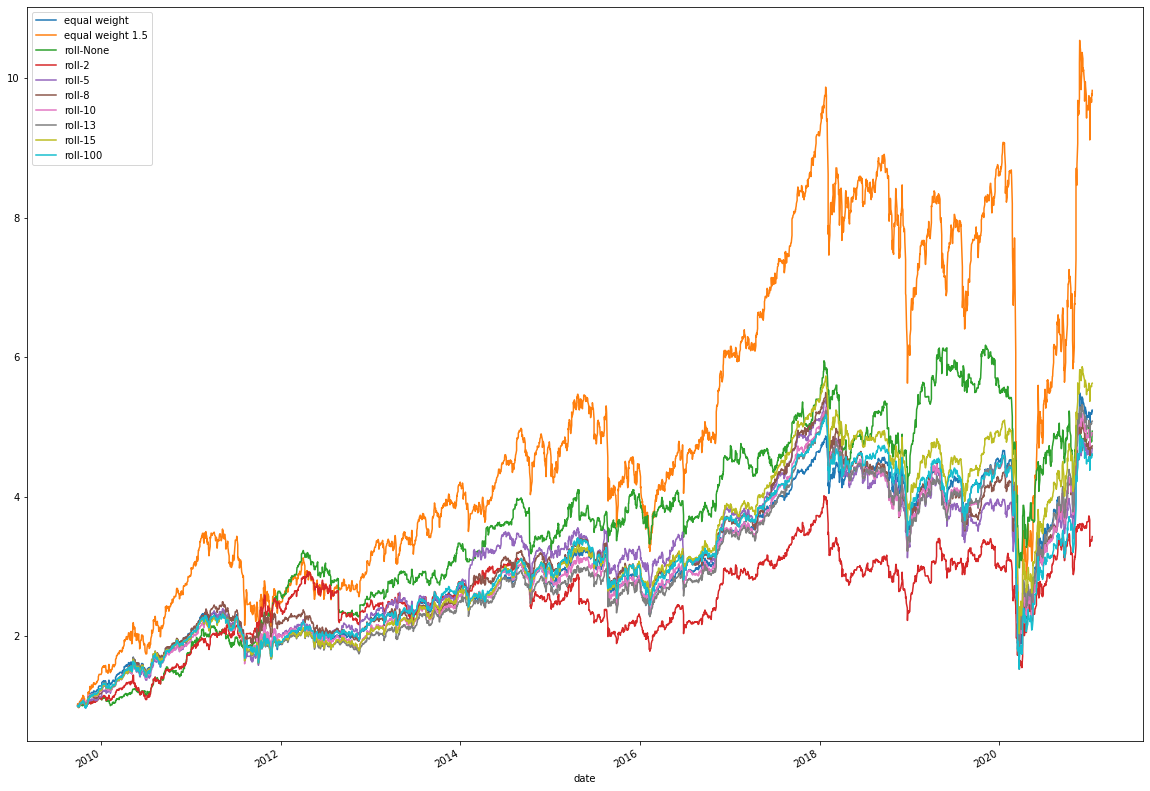

In [407]:
rets_tch.plot(figsize=(20, 15))
nperf.sharpe(drets_tch, returns_ref=drets_tch['equal weight']).sort_values()

In [408]:
factor = data_res['revenue'].unstack()
rets_rev, drets_rev = performance_data_list(factor, returns, rolls=[2, 5, 8, 10, 13, 15, 100], groups=sp500_gics)

roll-None          -0.523171
roll-2             -0.489727
roll-10            -0.205358
roll-15            -0.144285
roll-13            -0.135644
roll-8             -0.112045
roll-5             -0.060381
roll-100           -0.033891
equal weight        0.000000
equal weight 1.5    0.224453
dtype: float64

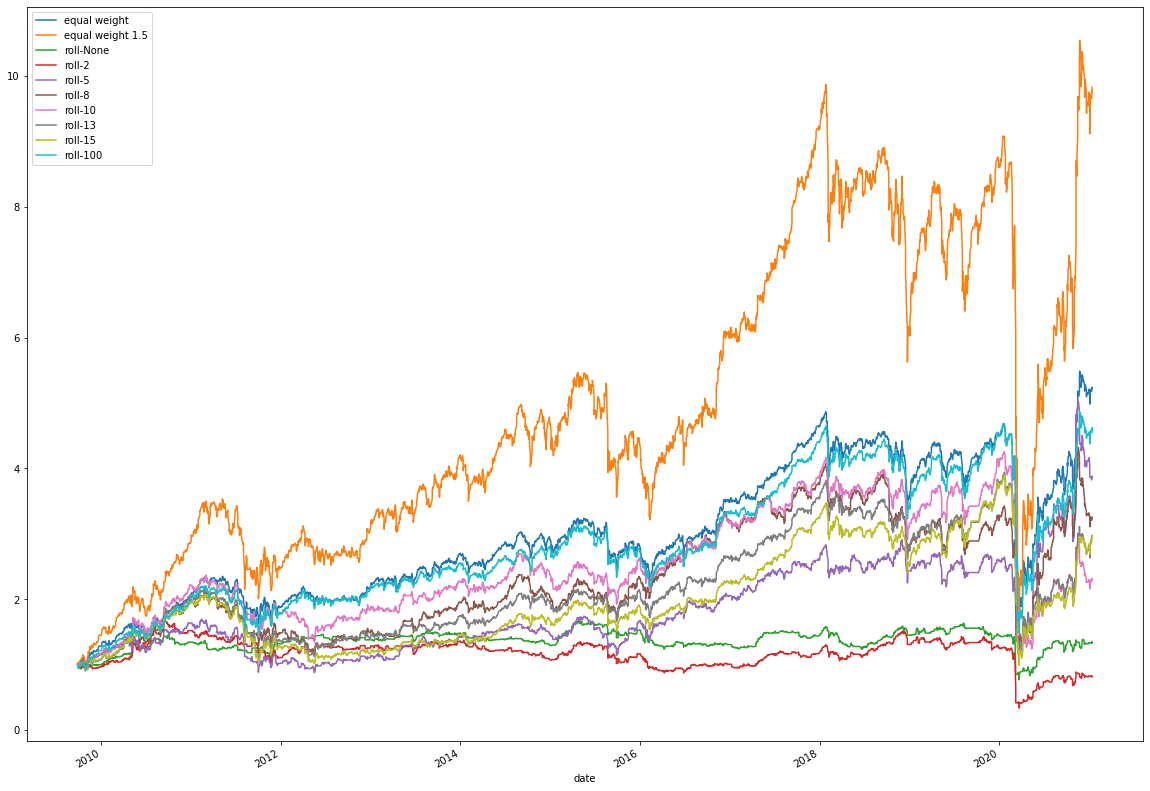

In [409]:
rets_rev.plot(figsize=(20, 15))
nperf.sharpe(drets_rev, returns_ref=drets_rev['equal weight']).sort_values()

roll-None          -0.273885
roll-2             -0.261291
roll-15            -0.113396
roll-5             -0.112827
roll-13            -0.107028
roll-10            -0.091626
roll-8             -0.062200
equal weight        0.000000
roll-100            0.028969
equal weight 1.5    0.224453
dtype: float64

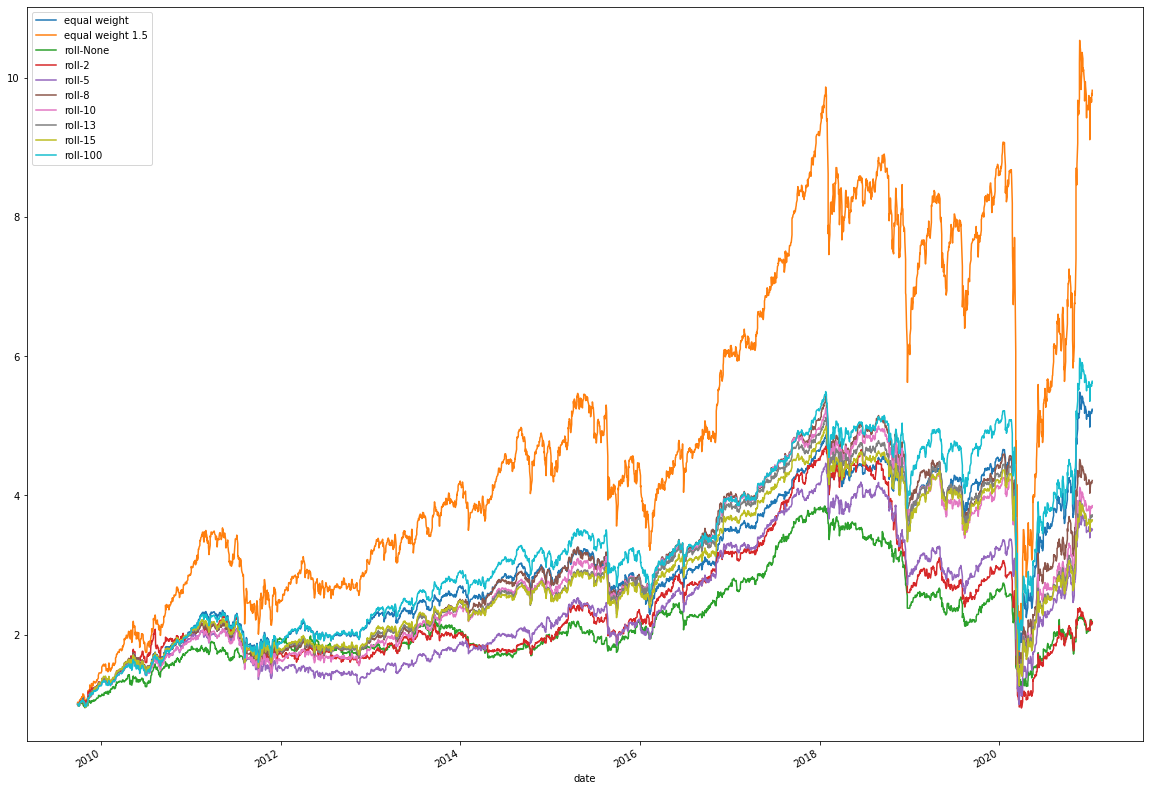

In [410]:
factor = data_res['improvement'].unstack()
rets_imp, drets_imp = performance_data_list(factor, returns, rolls=[2, 5, 8, 10, 13, 15, 100], groups=sp500_gics)
rets_imp.plot(figsize=(20, 15))
nperf.sharpe(drets_imp, returns_ref=drets_imp['equal weight']).sort_values()

roll-None          -0.538936
roll-2             -0.128910
roll-5             -0.098411
roll-100           -0.079339
equal weight        0.000000
roll-15             0.112334
equal weight 1.5    0.224453
roll-13             0.274507
roll-8              0.279961
roll-10             0.326153
dtype: float64

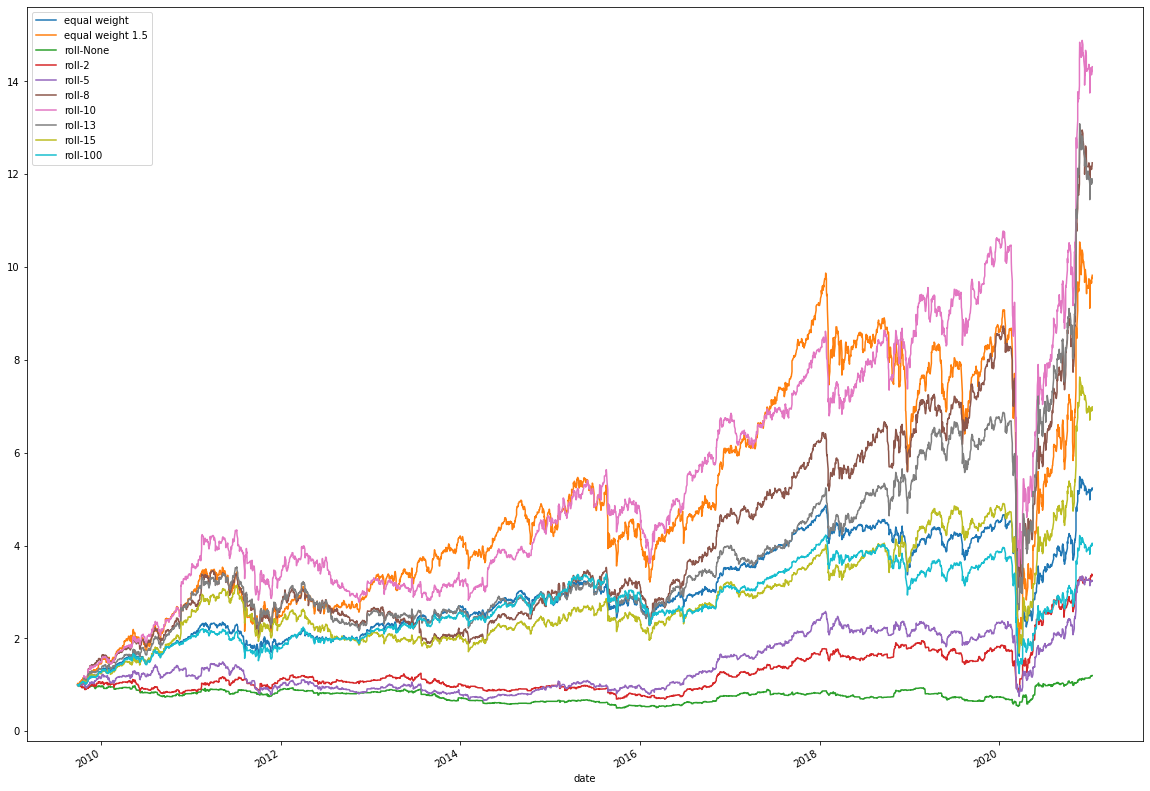

In [452]:
factor = data_res['conference'].unstack()
rets_, drets_ = performance_data_list(factor, returns, rolls=[2, 5, 8, 10, 13, 15, 100], groups=sp500_gics, trade_cost=5e-4)
rets_.plot(figsize=(20, 15))
nperf.sharpe(drets_, returns_ref=drets_['equal weight']).sort_values()

roll-None          -0.405799
roll-2             -0.191795
roll-10            -0.103855
roll-8             -0.096844
roll-15            -0.084889
equal weight        0.000000
roll-100            0.002810
roll-13             0.003259
roll-5              0.034524
equal weight 1.5    0.224453
dtype: float64

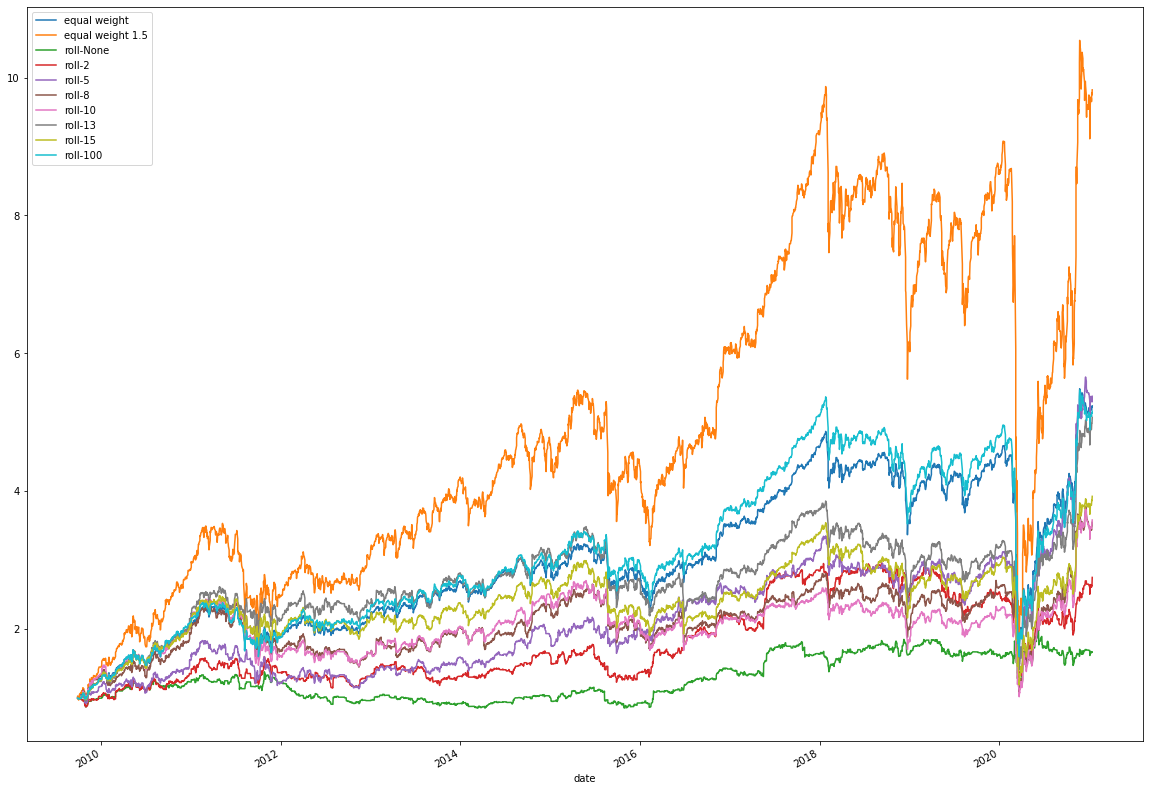

In [412]:
factor = data_res['report results'].unstack()
rets_, drets_ = performance_data_list(factor, returns, rolls=[2, 5, 8, 10, 13, 15, 100], groups=sp500_gics)
rets_.plot(figsize=(20, 15))
nperf.sharpe(drets_, returns_ref=drets_['equal weight']).sort_values()